# BASEMAP

#### BASIC INFO: https://matplotlib.org/basemap/

#### ARGS AND PROJECTIONS: https://matplotlib.org/basemap/api/basemap_api.html

#### GIT: https://github.com/matplotlib/basemap

### Installation
#### Mac anaconda: conda install basemap

#### Midway: 
#### module load netcdf/4.4.1+intel-16.0
#### module load geos

#### Windows: https://www.lfd.uci.edu/~gohlke/pythonlibs/#basemap

## 1. Load Modules

In [30]:
import numpy as np
import pandas as pd
import netCDF4 as nc
import scipy as sc
#Plotting
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import from_levels_and_colors
#Basemap
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid, maskoceans, interp, projection_params
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

## 2. Plot a Simple Map

In [26]:
m1=Basemap()

/Users/jamesfranke/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jamesfranke/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


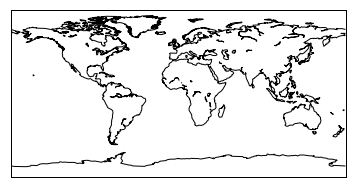

In [42]:
m1=Basemap()
m1.drawmapboundary()
m1.drawcoastlines()
plt.show()

## 3. Additional Args

/Users/jamesfranke/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jamesfranke/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


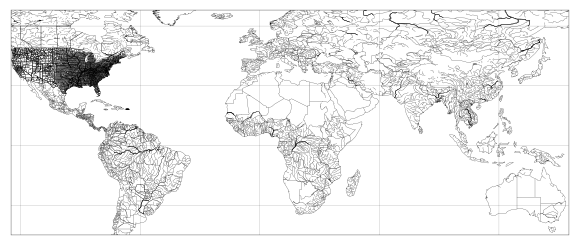

In [31]:
ll=-45; ul=68
llo=-125; ulo=155
mlw=0.2; mc='black'

#Initialize figure
fig = plt.figure(figsize=(10,10))
#Initialize map
m1 = Basemap(projection='cyl',llcrnrlat=ll,urcrnrlat=ul,llcrnrlon=llo,urcrnrlon=ulo,resolution='c')
#x, y = m1(lon2d, lat2d)
m1.drawmapboundary(linewidth=mlw, color=mc)
m1.drawcoastlines(linewidth=mlw, color=mc)
m1.drawcountries(linewidth=mlw, color=mc)
m1.drawstates(linewidth=mlw, color=mc)
m1.drawcounties(linewidth=mlw, color=mc)
m1.drawrivers(linewidth=mlw, color=mc)
m1.drawparallels(np.arange(-90.,120.,30.), linewidth=mlw, color=mc)
m1.drawmeridians(np.arange(0.,360.,60.), linewidth=mlw, color=mc)
plt.show()

/Users/jamesfranke/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/jamesfranke/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


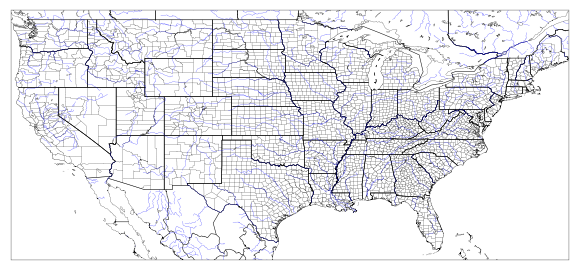

In [45]:
ll=24; ul=50 
llo=-125; ulo=-67
mlw=0.2; mc='black'

#Initialize figure
fig = plt.figure(figsize=(10,10))
#Initialize map
m1 = Basemap(projection='cyl', llcrnrlat=ll, urcrnrlat=ul, llcrnrlon=llo, urcrnrlon=ulo, resolution='i')
#x, y = m1(lon2d, lat2d)
m1.drawmapboundary(linewidth=mlw, color=mc)
m1.drawcoastlines(linewidth=mlw, color=mc)
m1.drawcountries(linewidth=0.5, color=mc)
m1.drawstates(linewidth=0.5, color=mc)
m1.drawcounties(linewidth=0.1, color=mc)
m1.drawrivers(linewidth=mlw, color='blue')
plt.show()

## 4. Projections 

/Users/jamesfranke/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


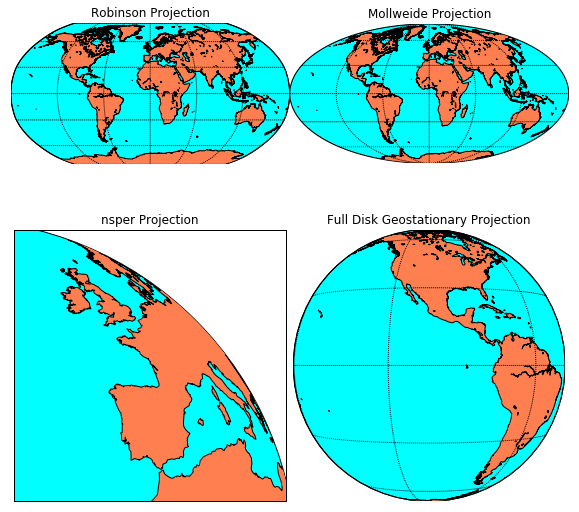

In [48]:
fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], height_ratios=[1,1])
gs.update(wspace=0.0, hspace=0)

ax1=plt.subplot(gs[0,0])
m1 = Basemap(projection='robin',lon_0=0,resolution='l')
m1.drawcoastlines()
m1.fillcontinents(color='coral',lake_color='aqua')
m1.drawparallels(np.arange(-90.,120.,30.))
m1.drawmeridians(np.arange(0.,360.,60.))
m1.drawmapboundary(fill_color='aqua')
plt.title("Robinson Projection")

ax2=plt.subplot(gs[1,0])
m2 = Basemap(resolution='l', satellite_height=3000000., projection='nsper', lat_0 = 30., lon_0 = -27.,
              llcrnrx=500000.,llcrnry=500000.,urcrnrx=2700000.,urcrnry=2700000.)
m2.drawmapboundary(fill_color='aqua')
m2.fillcontinents(color='coral',lake_color='aqua')
m2.drawcoastlines()
plt.title("nsper Projection")

ax3=plt.subplot(gs[0,1])
m3 = Basemap(projection='moll',lon_0=0,resolution='l')
m3.drawmapboundary(fill_color='aqua')
m3.drawcoastlines()
m3.fillcontinents(color='coral',lake_color='aqua')
m3.drawparallels(np.arange(-90.,120.,30.))
m3.drawmeridians(np.arange(0.,420.,60.))
plt.title("Mollweide Projection")

ax4=plt.subplot(gs[1,1])
m4 = Basemap(projection='geos',lon_0=-105,resolution='l')
m4.drawcoastlines()
m4.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m4.drawparallels(np.arange(-90.,120.,30.))
m4.drawmeridians(np.arange(0.,420.,60.))
m4.drawmapboundary(fill_color='aqua')
plt.title("Full Disk Geostationary Projection")
plt.show()

## 5. Plotting Data on the Map

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [50]:
cities=pd.read_csv('loc.csv', sep=',', )

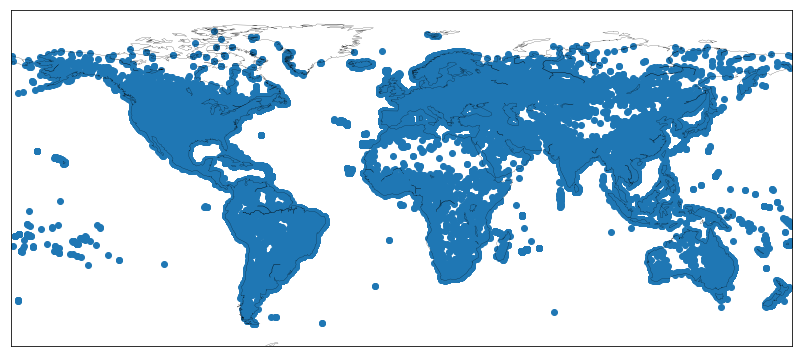

In [148]:
lat=cities['Lat']
lon=cities['Lon']
fig = plt.figure(figsize=(14,8))
m=Basemap(projection='cyl',llcrnrlat=-65,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines(linewidth=0.2)
plt.scatter(lon, lat)

In [130]:
cities_r=cities.sample(frac=0.01)

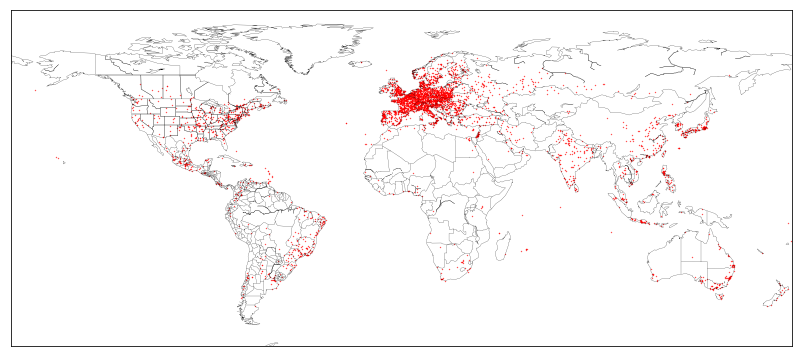

In [150]:
lat=cities_r['Lat']
lon=cities_r['Lon']
fig = plt.figure(figsize=(14,8))
m=Basemap(projection='cyl',llcrnrlat=-65,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines(linewidth=0.2)
m.drawcountries(linewidth=0.2)
m.drawstates(linewidth=0.2)
plt.scatter(lon, lat, s=0.1, color='red')

## 6. Plotting Fields on the Map

In [176]:
var=np.genfromtxt('maizeyield.csv', delimiter=',')
np.shape(var)

(360, 720)

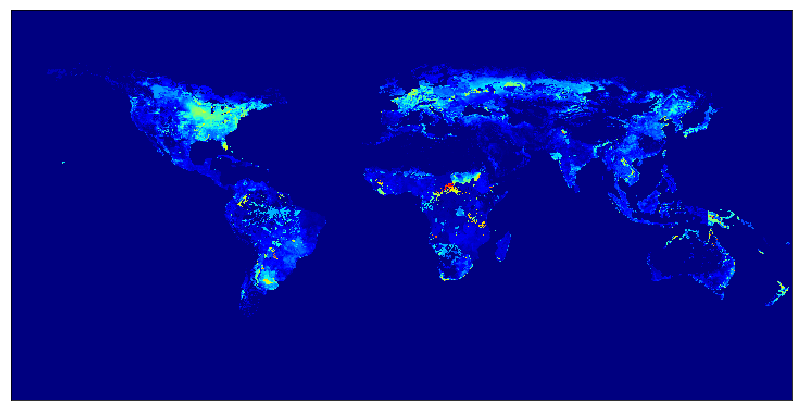

In [177]:
#Set up grid of coords
lat=np.linspace(90,-90, 360)
lon=np.linspace(-180,180, 720)
lon2d, lat2d = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(14,8))
m = Basemap()
x, y = m(lon2d, lat2d)
m.pcolor(x, y, var, cmap=plt.cm.jet)

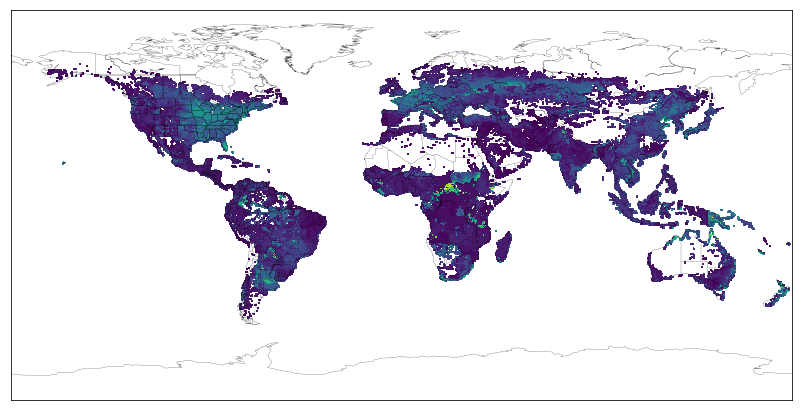

In [178]:
#Mask Zero Values
var_m=np.ma.masked_where(var==0, var)

lat=np.linspace(90,-90, 360)
lon=np.linspace(-180,180, 720)
lon2d, lat2d = np.meshgrid(lon, lat)

fig = plt.figure(figsize=(14,8))
m = Basemap()
x, y = m(lon2d, lat2d)
m.drawcoastlines(linewidth=0.2)
m.drawcountries(linewidth=0.2)
m.drawstates(linewidth=0.2)
m.pcolor(x, y, var_m)

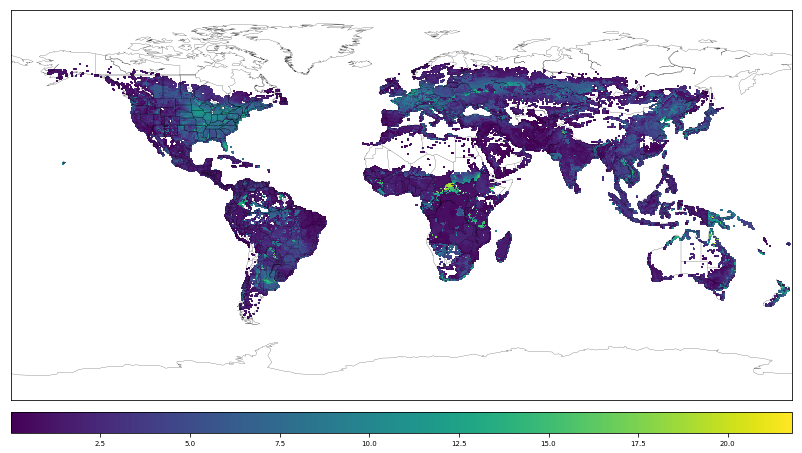

In [179]:
#Add Colorbar
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[10,0.5])
gs.update(wspace=0.0, hspace=0)

ax1=plt.subplot(gs[0,0])
m = Basemap()
x, y = m(lon2d, lat2d)
m.drawcoastlines(linewidth=0.2)
m.drawcountries(linewidth=0.2)
m.drawstates(linewidth=0.2)
m.pcolor(x, y, var_m)

axc=plt.subplot(gs[1,0])
plt.colorbar(cax=axc, orientation="horizontal")

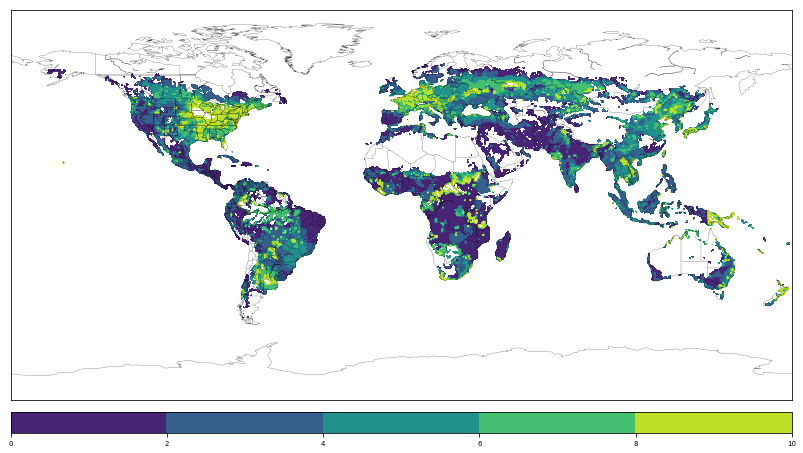

In [180]:
#Make contour plot
level=[0,2,4,6,8,10]

fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[10,0.5])
gs.update(wspace=0.0, hspace=0)

ax1=plt.subplot(gs[0,0])
m = Basemap()
x, y = m(lon2d, lat2d)
m.drawcoastlines(linewidth=0.2)
m.drawcountries(linewidth=0.2)
m.drawstates(linewidth=0.2)
m.contourf(x, y, var_m, levels=level)

axc=plt.subplot(gs[1,0])
plt.colorbar(cax=axc, orientation="horizontal")

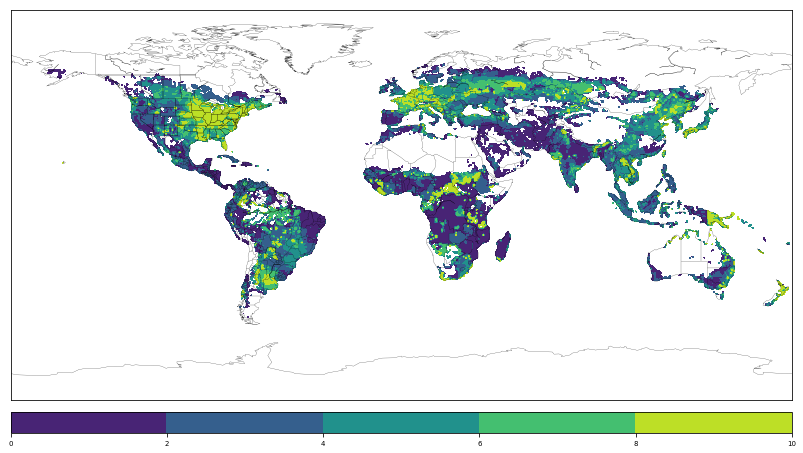

In [181]:
#Make contour plot highest contour not be white
var_m[var_m>10]=10
level=[0,2,4,6,8,10]

fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[10,0.5])
gs.update(wspace=0.0, hspace=0)

ax1=plt.subplot(gs[0,0])
m = Basemap()
x, y = m(lon2d, lat2d)
m.drawcoastlines(linewidth=0.2)
m.drawcountries(linewidth=0.2)
m.drawstates(linewidth=0.2)
m.contourf(x, y, var_m, levels=level)

axc=plt.subplot(gs[1,0])
plt.colorbar(cax=axc, orientation="horizontal")

/Users/jamesfranke/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


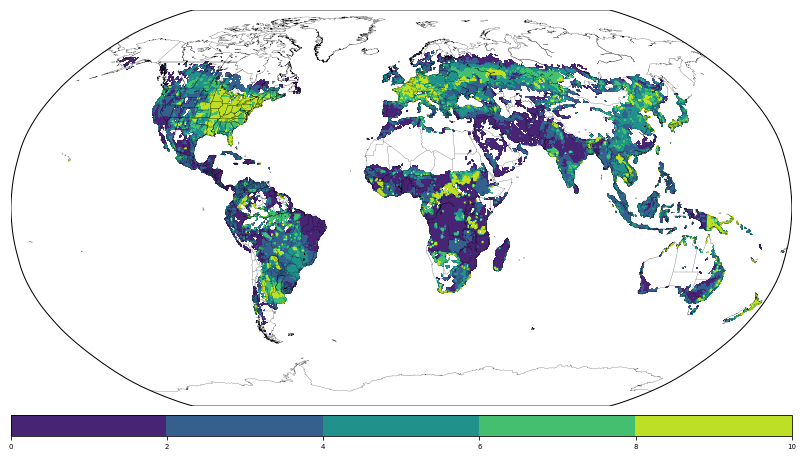

In [182]:
#Change Projection
level=[0,2,4,6,8,10]

fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[10,0.5])
gs.update(wspace=0.0, hspace=0)

ax1=plt.subplot(gs[0,0])
m = Basemap(projection='robin',lon_0=0,resolution='l')
x, y = m(lon2d, lat2d)
m.drawcoastlines(linewidth=0.2)
m.drawcountries(linewidth=0.2)
m.drawstates(linewidth=0.2)
m.contourf(x, y, var_m, levels=level)

axc=plt.subplot(gs[1,0])
plt.colorbar(cax=axc, orientation="horizontal")

### User-Defined Colormaps
http://colorbrewer2.org/#type=qualitative&scheme=Dark2&n=3

/Users/jamesfranke/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


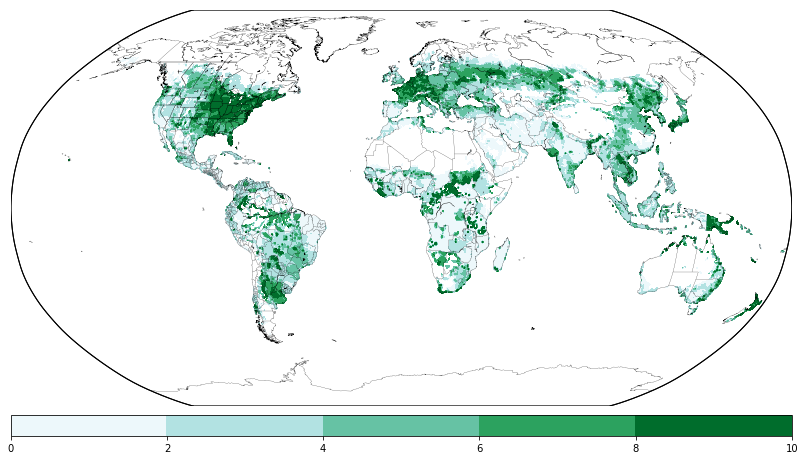

In [166]:
#Make contour plot highest contour not be white
level=[0,2,4,6,8,10]
cmap1,norm=from_levels_and_colors(levels=level, colors=('#edf8fb','#b2e2e2', '#66c2a4', '#2ca25f', '#006d2c'))

fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[10,0.5])
gs.update(wspace=0.0, hspace=0)

ax1=plt.subplot(gs[0,0])
m = Basemap(projection='robin',lon_0=0,resolution='l')
x, y = m1(lon2d, lat2d)
m.drawcoastlines(linewidth=0.2)
m.drawcountries(linewidth=0.2)
m.drawstates(linewidth=0.2)
m.contourf(x, y, var_m, levels=level, cmap=cmap1)

axc=plt.subplot(gs[1,0])
plt.colorbar(cax=axc, orientation="horizontal")

# Activity - IPCC Figure

In [ ]:
nc1=nc.Dataset('foo')
tas=nc1.variables['tas'][:]; nc1.close

## Random

In [ ]:
CB.set_ticklabels(('$\Delta$[fractional]:-1             ','-.75', '-.5','-.25','-.05','.05', '.25', '.5','.75', ''), update_ticks=True)
plt.savefig('my_fig.png', bbox_inches='tight', pad_inches = 0)

In [ ]:
m1.nightshade(date, color='k', delta=0.25, alpha=0.5, ax=None, zorder=2) #date needs to be a datetime object
dataout = interp(datain, xin, yin, xout, yout, checkbounds=False, masked=False, order=1)

In [ ]:
varc = np.ma.masked_array(varc, mask=maskoceans(lon2d,lat2d,np.ones_like(lon2d)).mask)

In [ ]:
lh=[0,1,100000]
bh=[None,'.....']

plt.rcParams['hatch.linewidth'] = 0.25
plt.rcParams['hatch.color'] = 'black'
plt.rcParams.update({'font.size': 7})
mc='black'